# 08. Decision Tree, ID3(Iterative Dichotomiser 3), C4.5, CART(Classification and Regression Trees)

- ### CART

In [3]:
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
import sys
sys.path.append(r"d:\\Practice\\Machine Learning\\04.Logistic Regression")
print('sys.path')
import ML_basic_function
from ML_basic_function import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

sys.path


(1)分类误差（Classification error）：        
$$
Classification\ error(t) = 1-\max_{1\leq i\leq c}[p(i|t)]
$$

> Where i represents the i-th category, the current data set has a total of c categories, and $p(i|t)$ represents the proportion of the i-th category data to the total data in the current data set. The so-called classification error is actually subtracting the proportion of the majority class from 1. For example, a data set containing 10 pieces of data has 6 pieces of category 0 data and 4 pieces of category 1 data. At this time, the classification error of the data set is 1-6/10 = 0.4. The classification error takes a value in the range of [0, 0.5]. The smaller the classification error, the higher the purity of the data set label.

(2)信息熵（Entropy）：        
$$
Entropy(t) = -\sum_{i=1}^c p(i|t)log_2p(i|t)
$$

> ID3、C4.5、C5.0

(3)基尼系数（Gini）：        
$$
Gini(t) = 1-\sum_{i=1}^c p(i|t)^2
$$

Different from information entropy, the Gini coefficient takes a value in the range of [0, 0.5], and the smaller the Gini coefficient, the higher the purity of the data set label.

> By default, the CART tree selects the Gini as the evaluation index.

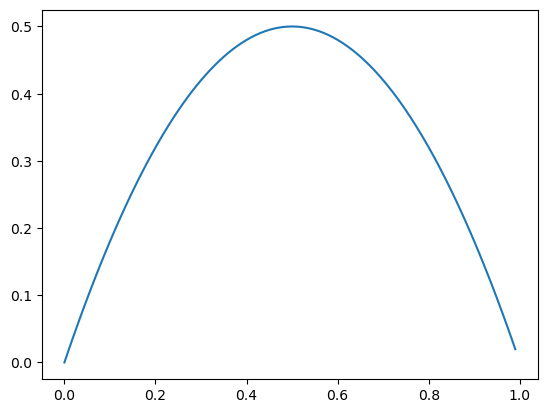

In [4]:
p_l = np.arange(0, 1, 0.01)

gini_l = []

for p in p_l:
    gini_l.append(1 - np.power([p, 1-p], 2).sum())

plt.plot(p_l, gini_l)

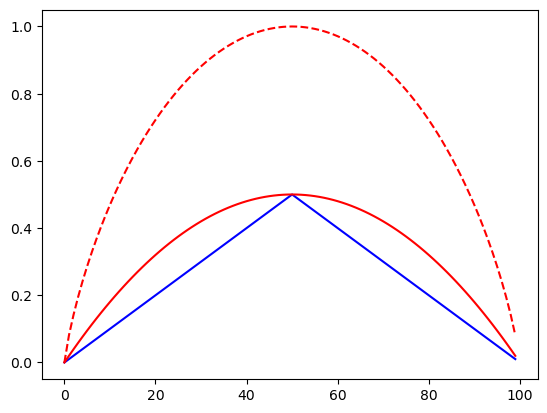

In [5]:
ce_l = []
gini_l = []
en_l = []

for p in p_l:
    ce_l.append(1-np.max([p, 1-p]))
    gini_l.append(1 - np.power([p, 1-p], 2).sum())
    en_l.append(entropy(p))

plt.plot(ce_l, 'b-', gini_l, 'r-', en_l, 'r--')

$$
Gini(B) = \frac{|B_1|}{|A|}Gini(B_1)+\frac{|B_2|}{|A|}Gini(B_2)
$$

In [6]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [7]:
X = np.array([[1, 1], [2, 2], [2, 1], [1, 2], [1, 1], [1, 2], [1, 2], [2, 1]])
y = np.array([0, 0, 0, 1, 0, 1, 1, 0])

In [8]:
clf = DecisionTreeClassifier().fit(X, y)

In [9]:
clf.score(X, y)

1.0

In [10]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[1] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

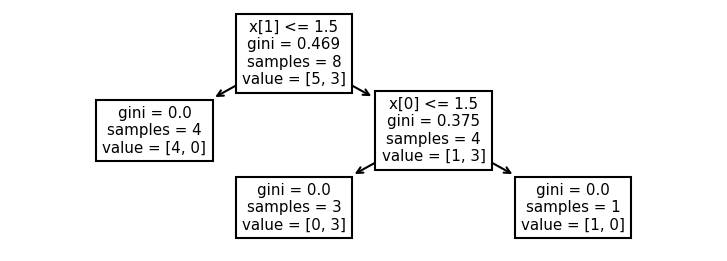

In [11]:
plt.figure(figsize=(6, 2), dpi=150)
tree.plot_tree(clf)

In [ ]:
DecisionTreeClassifier?

|Name|Description|      
|:--:|:--:| 
|criterion|规则评估指标或损失函数，默认基尼系数，可选信息熵| 
|splitter|树模型生长方式，默认以损失函数取值减少最快方式生长，可选随机根据某条件进行划分|
|max_depth|树的最大生长深度，类似max_iter，即总共迭代几次| 
|min_samples_split|内部节点再划分所需最小样本数| 
|min_samples_leaf|叶节点包含最少样本数| 
|min_weight_fraction_leaf|叶节点所需最小权重和| 
|max_features|在进行切分时候最多带入多少个特征进行划分规则挑选|
|random_state|随机数种子| 
|max_leaf_nodes|叶节点最大个数| 
|min_impurity_decrease|数据集再划分至少需要降低的损失值| 
|min_impurity_split|数据集再划分所需最低不纯度，将在0.25版本中移除| 
|class_weight|各类样本权重| 
|presort|已在0.24版本中移除| 
|ccp_alpha|在执行CART树原生原理中的剪枝流程时结构复杂度惩罚因子的系数，默认情况下不使用该方法进行剪枝| 

- criterion：不纯度衡量指标

*相比信息熵，基尼系数复杂度更低、计算速度更快，一般情况下推荐使用基尼系数。而如果一定要寻找二者在使用上的不同，一般认为在有些情况下，基尼不纯度更倾向于在数据集中分割出多数类，而信息熵则更倾向于生成出更加平衡的树。*

*Compared with information entropy, the Gini coefficient is less complex and faster to calculate. Generally, it is recommended to use the Gini coefficient. If you must look for differences in the use of the two, it is generally believed that in some cases, Gini impurity is more inclined to segment the majority class in the data set, while information entropy is more inclined to generate a more balanced tree.*

- ccp_alpha：Cost-Complexity Pruning 结构风险权重

&emsp;&emsp;Pruning with a CCP term is also called minimum complexity pruning. Its principle is to add a structural risk term to the loss function of the decision tree, similar to the regularization term that plays the same role in the loss function of a linear equation.

$$
R_\alpha(T) = R(T) + \alpha|\widetilde{T}|
$$

&emsp;&emsp;Where $R_\alpha(T)$ is the loss function after adding the risk structure item, and $\alpha$ is the coefficient of the risk structure item. It can be seen that the larger the value of $\alpha$, the greater the structural risk penalty on the model, the simpler the model structure, and over-fitting can be better suppressed, and vice versa.

- Parameter class that controls the tree structure

&emsp;&emsp;his type of parameters can be further subdivided into two categories. 

&emsp;&emsp;One is to limit the overall structure of the model, which mainly includes the max_depth parameter that limits the depth of the tree and the max_leaf_nodes parameter that limits the number of leaf nodes.

&emsp;&emsp;the second category is parameters that limit tree growth, including parameters that limit tree growth from the number of node samples, including the two parameters min_samples_split and min_samples_leaf. there are also parameters that limit tree growth from the perspective of loss value reduction, including the min_impurity_split and min_impurity_decrease parameters.

> For tree models, too many leaf nodes, too few samples contained in individual leaf nodes, and small Gini coefficients reduced by re-dividing internal nodes are all possible manifestations of overfitting, and need to pay attention to when modeling. .

- Parameter classes that control iterative stochastic processes

The first is the splitter parameter. When the value of this parameter is random, the classification rules are actually randomly selected to divide the current data set. The second is max_features. This parameter can be set arbitrarily to bring in up to several features for alternative rule mining. As long as The setting of this parameter does not bring in all the features for modeling. It is equivalent to randomly drawing a range for the candidate features, and it is also equivalent to adding a certain degree of randomness to the training of the tree model. Of course, the main functions of these two parameters have two aspects. One is to improve the model training speed. Imagine if we only select the best division rule from individual features, or randomly generate a division rule without comparison. Direct use can actually greatly save the amount of calculation, but this is also a way of exchanging accuracy for efficiency. This operation will definitely bring about a decrease in the accuracy of the model results; however, randomness is actually a double-edged sword. In integration During learning, in order to make the basic classifiers "harmony but different", each base classifier must ensure a certain degree of randomness, and the decision tree is the model most commonly used as a base classifier to participate in ensemble learning, so the tree model These parameters that control its randomness will also play a role in ensemble learning.

---

- ### ID3、C4.5

- - ID3

In [12]:
# Information entropy of parent node A
ent_A = -5/14 * np.log2(5/14) - 9/14 * np.log2(9/14)
ent_A

0.9402859586706311

In [13]:
# Information entropy of child node B
ent_B1 = entropy(2/5)
ent_B2 = entropy(2/5)
ent_B3 = 0
ent_B1, ent_B2, ent_B3

(0.9709505944546686, 0.9709505944546686, 0)

In [14]:
ent_B = ent_B1 * 5/14 + ent_B2 * 5/14 + ent_B3 * 4/14
ent_B

0.6935361388961919

In [15]:
# Gain(information gain) 
ent_A - ent_B

0.24674981977443922

- - C4.5

- - - 信息值（information value）

$$
Information\ Value = -\sum^K_{i=1}P(v_i)log_2P(v_i)
$$

> The IV value calculation formula is basically the same as the information entropy calculation formula, except that the specific calculated proportion is no longer the proportion of various types of samples, but the proportion of data of each divided sub-node, or the information entropy calculation label is different The degree of confusion in the values, and the IV value is the degree of confusion in different values of the calculated feature.

Among them, K represents the total number of branches in a certain division, $v_i$ represents a certain sample after division, and $P(v_i)$ represents the proportion of the number of samples in the data volume of the parent node. For the following three data set division situations, simply calculate the IV value:

In [ ]:
# parent node divided by 50%-50%
- (1/2 * np.log2(1/2) + 1/2 * np.log2(1/2))

# parent node divided by/4-1/2-1/
- (1/4 * np.log2(1/4) + 1/2 * np.log2(1/2)+ 1/4 * np.log2(1/4))

# parent node divided by1/4-1/4-1/4-1/
- (1/4 * np.log2(1/4) + 1/4 * np.log2(1/4) + 1/4 * np.log2(1/4) + 1/4 * np.log2(1/4))

$$
Gain\ Ratio = \frac{Information\ Gain}{Information\ Value}
$$

In [16]:
IG = ent_A - ent_B
IV = - (5/14 * np.log2(5/14) + 5/14 * np.log2(5/14)+ 4/14 * np.log2(4/14))
GR = IG / IV
GR

0.1564275624211752

---

- ### CART

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor?

- criterion='mae'

$$
MAE = \frac{1}{m}\sum^m_{i=1}|(y_i-\hat y _i)|
$$

- criterion='friedman_mse'

&emsp;&emsp;friedman_mse是一种基于mse的改进型指标，是由GBDT（梯度提升树，一种集成算法）的提出者friedman所设计的一种残差计算方法，是sklearn中树梯度提树默认的criterion取值，对于单独的树决策树模型一般不推荐使用。